In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline

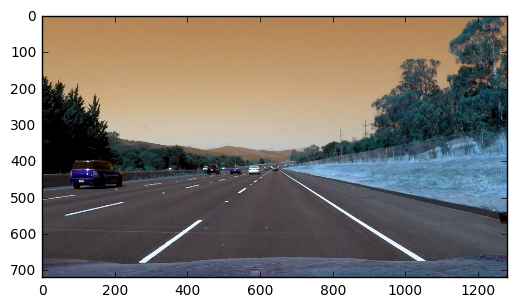

In [2]:
image = cv2.imread('./test_images/straight_lines2.jpg')
plt.imshow(image)

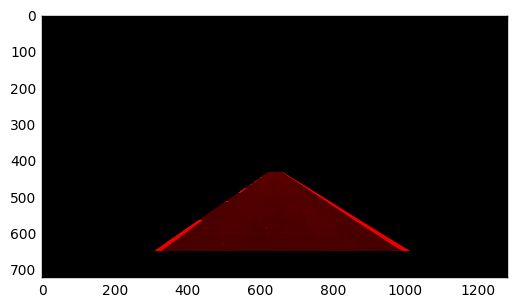

In [36]:
imshape = image.shape
mask = np.zeros_like(image)
vertices = np.array([[(0.485*imshape[1],0.60*imshape[0]),(0.24*imshape[1], 0.9*imshape[0]), (0.79*imshape[1], 0.9*imshape[0]), (0.518*imshape[1], 0.60*imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image, mask)
plt.imshow(masked_image)

In [25]:
def calibrate():
    chessboard_list = os.listdir("./camera_cal")
    nx = 9
    ny = 6

    objpoints = []
    imgpoints = []

    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

    for chessboard in chessboard_list:

        img = cv2.imread("./camera_cal/" + chessboard)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[0], img.shape[1]), None, None)

    calibration_parameters = {}
    calibration_parameters["mtx"] = mtx
    calibration_parameters["dist"] = dist
    pickle.dump(calibration_parameters, open("calibration.p", "wb"))
    return mtx, dist

In [26]:
def undistort(image, mtx, dist):
    undist = cv2.undistort(image, mtx,
                            dist, None,
                            mtx)
    return undist

In [27]:
def perspective_transform(image, source_points, destination_points):
    M = cv2.getPerspectiveTransform(source_points, destination_points)
    Minv = cv2.getPerspectiveTransform(destination_points, source_points)
    warped = cv2.warpPerspective(image, M, (1280, 720), flags=cv2.INTER_LINEAR)

    return warped, Minv

In [37]:
source_points = np.float32([[0.485 * imshape[1], 0.60 * imshape[0]], [0.24 * imshape[1], imshape[0]],
                          [0.79* imshape[1], imshape[0]], [0.518 * imshape[1], 0.60 * imshape[0]]])
destination_points = np.float32([[200, 0], [200, 720], [980, 720], [980, 0]])

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mtx, dist = calibrate()

undist = undistort(gray, mtx, dist)

warped, _ = perspective_transform(undist, source_points, destination_points)






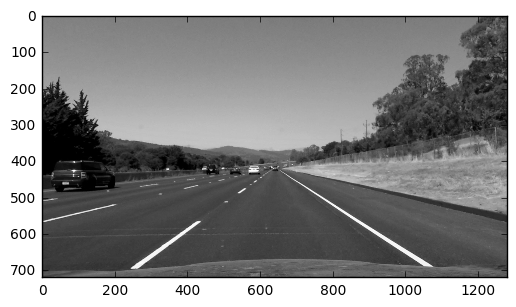

In [38]:
plt.imshow(undist, cmap='gray')

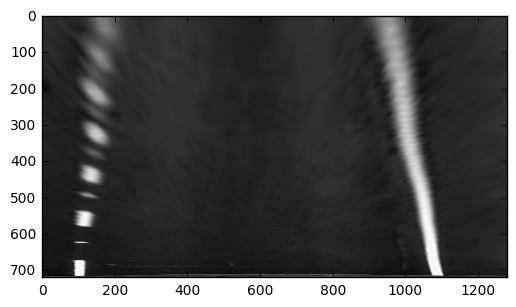

In [39]:
plt.imshow(warped, cmap='gray')